In [1]:
import pandas as pd

# 생활인구 분석

##### 동별 코드값 데이터 호출

In [2]:
code_data = pd.read_excel("행정동코드.xlsx")
code_data

FileNotFoundError: [Errno 2] No such file or directory: '행정동코드.xlsx'

In [3]:
# 필요없는 0번째 행 데이터값 삭제
code_data = code_data.drop(0, axis=0)

##### 생활인구 데이터 호출

In [4]:
people_data = pd.read_csv("생활인구.csv", encoding = 'CP949')

In [5]:
# 기준일ID가 20241221인 데이터만 필터링
## 제일 최기 날짜 생활인구 분석위해서 ....
filtered_people_data = people_data[people_data["기준일ID"] == 20241221]

##### 값이 커서 잘리는 요소 없애기 위해...

In [6]:
import pandas as pd

# 출력 행 수와 열 수의 제한을 해제 (option.display)
pd.set_option('display.max_rows', None)  # 최대 행 수 제한 해제
pd.set_option('display.max_columns', None)  # 최대 열 수 제한 해제

# 열 너비 제한 해제
pd.set_option('display.max_colwidth', None)

##### 사전에 선정했던 공실면적 top 5 공실의 지역 코드로만 한정

In [ ]:
target_codes = [11590680, 11740610, 11440600, 11140615, 11590620]

# 기준일ID가 20241221이고, 행정동 코드가 target_codes에 포함된 데이터만 필터링
real_people_data = filtered_people_data[
    (filtered_people_data["행정동코드"].isin(target_codes))
]

# 결과 출력
real_people_data

##### 기준일 칼럼 앞으로 가져오기

In [8]:
cols = ['지역'] + [col for col in real_people_data.columns if col != '지역']
real_people_data = real_people_data[cols]

KeyError: "['지역'] not in index"

##### 생활인구수 파악하기 위해 소숫점 삭제 (정수로 변환)

In [10]:
# 모든 숫자형 컬럼에서 소숫점 제거 (정수로 변환)
real_people_data = real_people_data.applymap(lambda x: int(x) if isinstance(x, (int, float)) else x)

C:\Users\user\AppData\Local\Temp\ipykernel_23992\2591767288.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  real_people_data = real_people_data.applymap(lambda x: int(x) if isinstance(x, (int, float)) else x)


##### 지역 / 시간대별로 나열 후 새로 변수 지정

In [11]:
real_people_data_sorted = real_people_data.sort_values(by=['지역', '시간대구분'])

# 인덱스 새로 만들기 (기존 인덱스는 무시)
people_mydata = real_people_data_sorted.reset_index(drop=True)

# # 결과 출력 (변경된 데이터 확인)
# people_mydata

KeyError: '지역'

#### 새로운 csv 파일로 저장

In [24]:
# people_mydata DataFrame을 CSV 파일로 저장
people_mydata.to_csv('people_mydata.csv', index=False)

# 저장된 파일 확인 메시지 출력
print("파일이 'people_mydata.csv'로 저장되었습니다.")

NameError: name 'people_mydata' is not defined

In [ ]:
people_mydata = pd.read_csv("people_mydata.csv")
people_mydata

##### 정리한 데이터 시각화

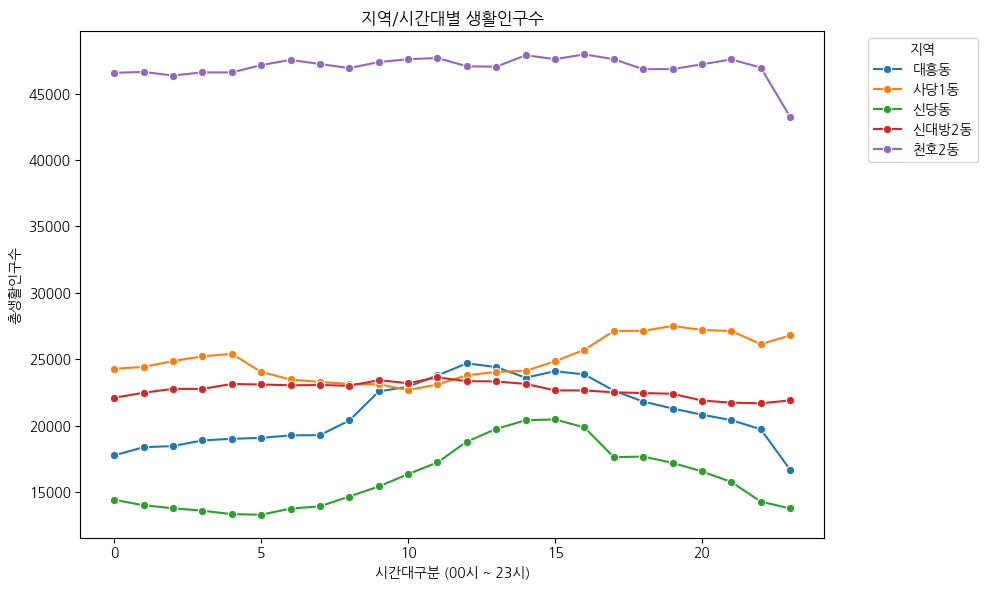

C:\Users\오인용\AppData\Local\Temp\ipykernel_62412\552284453.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='지역', y='총생활인구수', data=max_population_time, palette='viridis')


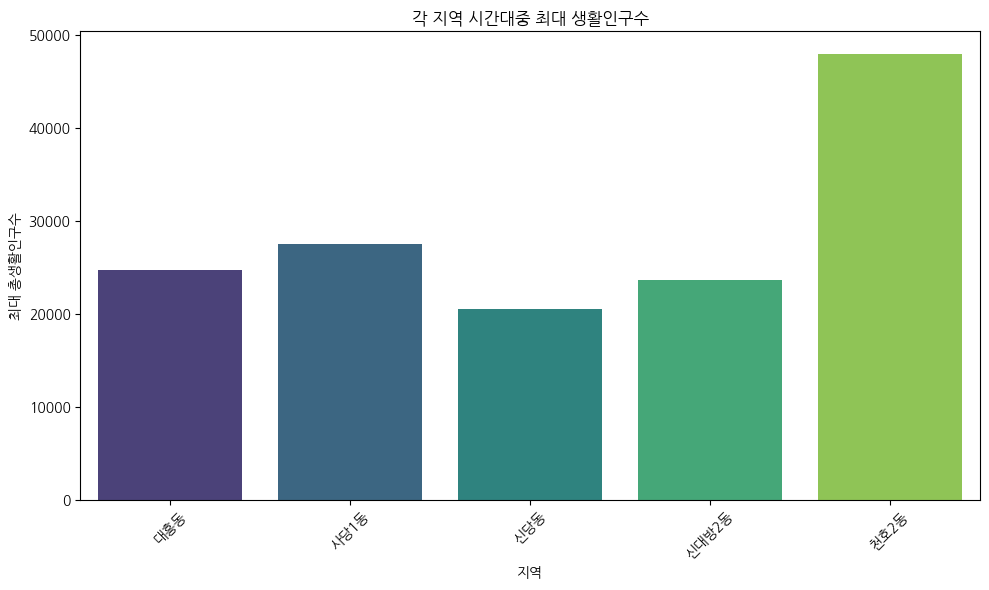

각 지역에서 총생활인구수가 가장 높은 시간대:
대흥동 - 시간대 12 시, 총생활인구수: 24692
사당1동 - 시간대 19 시, 총생활인구수: 27510
신당동 - 시간대 15 시, 총생활인구수: 20474
신대방2동 - 시간대 11 시, 총생활인구수: 23637
천호2동 - 시간대 16 시, 총생활인구수: 47956


In [6]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1. 지역별로 데이터 필터링하고, 시간대별 총생활인구수 집계
# 각 지역별로 그룹화 후 시간대별 총생활인구수 합산
grouped_data = people_mydata.groupby(['지역', '시간대구분'])['총생활인구수'].sum().reset_index()

# 2. 각 지역에서 시간대별 최고 총생활인구수 확인
# 지역별 최고 생활인구 시간대 찾기
max_population_time = grouped_data.loc[grouped_data.groupby('지역')['총생활인구수'].idxmax()]

# 3. 5개의 시각화 예시:
# - 각 지역에 대해 시간대별 총생활인구수 그래프
# - 각 지역의 최고 생활인구수 시간대
# - 시간대별로 총 생활인구수 비교 (지역별로)

# 시각화 1: 지역별 시간대별 총생활인구수 그래프
plt.figure(figsize=(10, 6))
sns.lineplot(x='시간대구분', y='총생활인구수', hue='지역', data=grouped_data, marker='o')
plt.title('지역/시간대별 생활인구수')
plt.xlabel('시간대구분 (00시 ~ 23시)')
plt.ylabel('총생활인구수')
plt.legend(title='지역', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 시각화 2: 각 지역에서 최고 생활인구 시간대 시각화 (바 차트)
plt.figure(figsize=(10, 6))
sns.barplot(x='지역', y='총생활인구수', data=max_population_time, palette='viridis')
plt.title('각 지역 시간대중 최대 생활인구수')
plt.xlabel('지역')
plt.ylabel('최대 총생활인구수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 시각화 3: 각 지역에서 최고 생활인구 시간대 출력 (텍스트)
print("각 지역에서 총생활인구수가 가장 높은 시간대:")
for idx, row in max_population_time.iterrows():
    print(f"{row['지역']} - 시간대 {row['시간대구분']} 시, 총생활인구수: {row['총생활인구수']}")

In [7]:
# "지역" 칼럼을 기준으로 그룹화하여 합산
grouped_data = people_mydata.groupby("지역").sum()

# 결과 확인
print(grouped_data)

# 새로운 데이터프레임으로 저장
grouped_data.reset_index(inplace=True)  # 인덱스를 초기화하여 "지역"을 일반 칼럼으로
print(grouped_data)

# 새로운 데이터프레임을 CSV로 저장 (선택)
grouped_data.to_csv("지역합산.csv", index=False, encoding="utf-8")


           기준일ID  시간대구분   총생활인구수  남자0세부터9세생활인구수  남자10세부터14세생활인구수  \
지역                                                                 
대흥동    485789304    276   503965          10574             7447   
사당1동   485789304    276   598708          15106             5859   
신당동    485789304    276   386038           3026             2199   
신대방2동  485789304    276   545497          18217             9700   
천호2동   485789304    276  1128018          40510            18104   

       남자15세부터19세생활인구수  남자20세부터24세생활인구수  남자25세부터29세생활인구수  남자30세부터34세생활인구수  \
지역                                                                          
대흥동              14141            38511            30514            19465   
사당1동              9137            20430            37975            33992   
신당동               3458            11030            15791            17838   
신대방2동            14657            15826            22951            22226   
천호2동             22367            26687            40464     

In [8]:
sum_data = pd.read_csv("지역합산.csv")
sum_data

,지역,기준일ID,시간대구분,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,대흥동,485789304,276,503965,10574,7447,14141,38511,30514,19465,...,36605,21639,19108,16843,18765,14931,12191,9651,7669,21549
1,사당1동,485789304,276,598708,15106,5859,9137,20430,37975,33992,...,42200,33200,27451,18596,21199,18900,22210,20229,15323,34935
2,신당동,485789304,276,386038,3026,2199,3458,11030,15791,17838,...,22160,18854,20134,16887,16217,15664,15057,14090,7713,22099
3,신대방2동,485789304,276,545497,18217,9700,14657,15826,22951,22226,...,27671,23754,23249,21051,24211,21483,19802,17937,13720,38445
4,천호2동,485789304,276,1128018,40510,18104,22367,26687,40464,45834,...,49001,47078,51838,43466,45209,42178,45483,43346,32539,83278


In [9]:
# 기준일ID 칼럼의 값을 모두 20241221로 변경
sum_data["기준일ID"] = 20241221

# 시간대구분 칼럼 삭제
sum_data = sum_data.drop(columns=["시간대구분"])

# 결과 확인
# print(sum_data)


In [10]:
sum_data

,지역,기준일ID,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,남자35세부터39세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,대흥동,20241221,503965,10574,7447,14141,38511,30514,19465,19591,...,36605,21639,19108,16843,18765,14931,12191,9651,7669,21549
1,사당1동,20241221,598708,15106,5859,9137,20430,37975,33992,31692,...,42200,33200,27451,18596,21199,18900,22210,20229,15323,34935
2,신당동,20241221,386038,3026,2199,3458,11030,15791,17838,21622,...,22160,18854,20134,16887,16217,15664,15057,14090,7713,22099
3,신대방2동,20241221,545497,18217,9700,14657,15826,22951,22226,24452,...,27671,23754,23249,21051,24211,21483,19802,17937,13720,38445
4,천호2동,20241221,1128018,40510,18104,22367,26687,40464,45834,51054,...,49001,47078,51838,43466,45209,42178,45483,43346,32539,83278


In [11]:
# 남자와 여자의 생활인구 수 계산
sum_data['남자생활인구수'] = (sum_data.filter(like='남자').sum(axis=1))  # 남자 관련 칼럼의 합
sum_data['여자생활인구수'] = (sum_data.filter(like='여자').sum(axis=1))  # 여자 관련 칼럼의 합

# 총생활인구수 계산 (남자 + 여자)
sum_data['총생활인구수'] = sum_data['남자생활인구수'] + sum_data['여자생활인구수']

# 지역별로 그룹화 후, 각 지역에 대한 남자, 여자 비율 계산
grouped_data = sum_data.groupby('지역').agg({
    '총생활인구수': 'sum',
    '남자생활인구수': 'sum',
    '여자생활인구수': 'sum'
}).reset_index()

 # 남자 비율과 여자 비율 계산
grouped_data['남자비율'] = grouped_data['남자생활인구수'] / grouped_data['총생활인구수'] * 100
grouped_data['여자비율'] = grouped_data['여자생활인구수'] / grouped_data['총생활인구수'] * 100

 # 결과 출력
grouped_data

 # 만약 CSV로 저장하고 싶다면:
grouped_data.to_csv('지역별남녀비율.csv', index=False, encoding="utf-8")


In [12]:
grouped_data

,지역,총생활인구수,남자생활인구수,여자생활인구수,남자비율,여자비율
0,대흥동,503628,232381,271247,46.141398,53.858602
1,사당1동,598393,289201,309192,48.329609,51.670391
2,신당동,385708,180978,204730,46.920987,53.079013
3,신대방2동,545175,255866,289309,46.932820,53.067180
4,천호2동,1127700,547443,580257,48.545092,51.454908


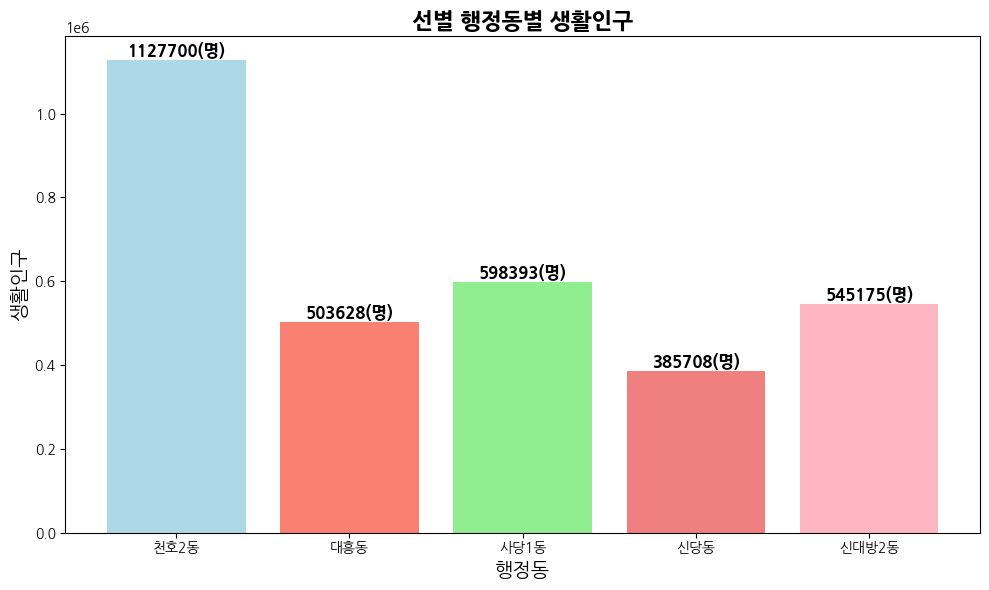

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 지역 순서대로 정렬
order = ['천호2동', '대흥동', '사당1동', '신당동', '신대방2동']
grouped_data['지역'] = pd.Categorical(grouped_data['지역'], categories=order, ordered=True)
grouped_data = grouped_data.sort_values('지역')

# 색상 리스트 (각각 다른 색상으로 설정)
colors = ['lightblue', 'salmon', 'lightgreen', 'lightcoral', 'lightpink']

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 막대 그래프 그리기
bars = plt.bar(grouped_data['지역'], grouped_data['총생활인구수'], color=colors)

# 각 막대 위에 수치를 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, f'{yval}(명)', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# 제목 및 축 레이블 설정
plt.title('선별 행정동별 생활인구', fontsize=16, fontweight='bold')
plt.xlabel('행정동', fontsize=14)
plt.ylabel('생활인구', fontsize=14)

# 그래프 출력
plt.tight_layout()
plt.show()


In [42]:
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

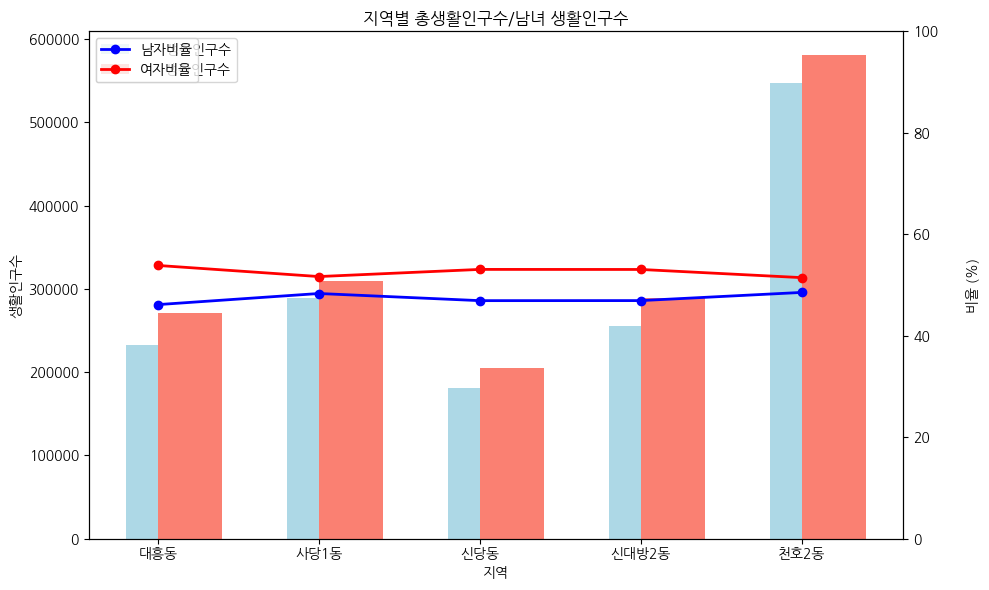

In [15]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import pandas as pd

# 1x2 Grid로 그래프 배치 (총생활인구수와 비율을 각각 다른 그래프에 표시) 
fig, ax1 = plt.subplots(figsize=(10, 6))

# 총생활인구수, 남자/여자 생활인구수를 바 차트로 나타내기
ax1.bar(grouped_data['지역'], grouped_data['남자생활인구수'], width=0.4, label='남자생활인구수', align='center', color='lightblue')
ax1.bar(grouped_data['지역'], grouped_data['여자생활인구수'], width=0.4, label='여자생활인구수', align='edge', color='salmon')

# x, y 축 라벨 및 제목 설정
ax1.set_xlabel('지역')
ax1.set_ylabel('생활인구수')
ax1.set_title('지역별 총생활인구수/남녀 생활인구수')

# 레전드 추가
ax1.legend()

# 2번째 축을 이용해 비율을 라인 차트로 그리기
ax2 = ax1.twinx()  # 같은 x축을 공유하는 새로운 y축 생성
ax2.plot(grouped_data['지역'], grouped_data['남자비율'], color='blue', marker='o', label='남자비율', linestyle='-', linewidth=2)
ax2.plot(grouped_data['지역'], grouped_data['여자비율'], color='red', marker='o', label='여자비율', linestyle='-', linewidth=2)

# 비율 y축 설정
ax2.set_ylabel('비율 (%)', labelpad=20)  # 'labelpad'로 레이블 간격 조정, 비율 레이블을 아래로 이동
ax2.set_ylim(0, 100)  # 비율은 0~100% 범위로 설정

# 그래프 제목, 레전드 및 레이아웃 설정
ax2.legend(loc='upper left')
fig.tight_layout()

# 그래프 출력
plt.show()


In [ ]:
# 시간대모두 합친 후 역별 / 연령 / 성별 별 데이터 ?